In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 
## Session 02b

## Implementation of Single Layer with Sigmoid

<img src='../../prasami_images/prasami_color_tutorials_small.png' width='400' alt="By Pramod Sharma : pramod.sharma@prasami.com" align = "left"/>


## 1. Import Statements

In [2]:
###-----------------
### Import Libraries
###-----------------

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
%matplotlib inline

## 2. Setup Global Parameters

In [3]:
inpDir = '../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 200  # number of epochs
ALPHA = 0.001  # learning rate

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm

## 3. Generate Data Set
<div style="font-family: Arial; font-size:1.1em;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [4]:
X, y = datasets.make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0]))

## 4. Visualization
<p style="font-family: Arial; font-size:1.2em;">
DataFrames are easier to visualize
</p>

In [5]:
# Create daframe from X and y matrices
data_df = pd.DataFrame(X, columns = ['A', 'B']) 

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [6]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [7]:
# what labels are present?
data_df.target.unique()

array([0, 1])

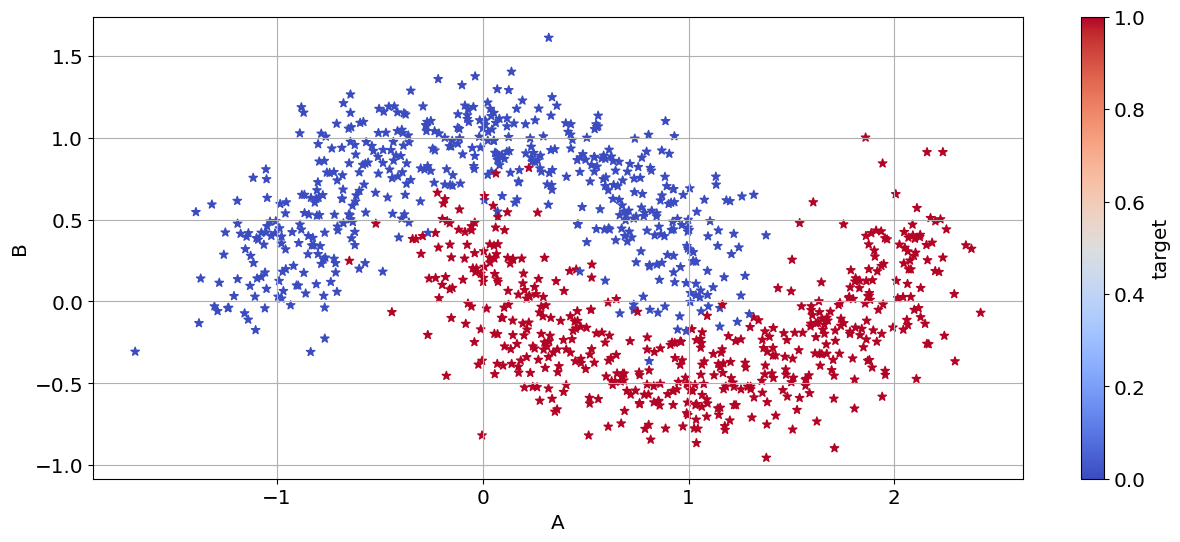

In [8]:
data_df.plot.scatter('A', 'B', 
                     s=40,
                     marker = '*', 
                     c = 'target',
                     cmap=CMAP);

#### In case you want to plot X Array directly uncomment following lines
# Plot the data
#plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=plt.cm.bwr)

plt.grid()

<p style="font-family: Arial; font-size:1.2em">
    We will keep 10%, i.e. 100 records for testing and remaining records will be used in training.
</p>

In [9]:
# Splitting in train and test dataset. Type will be numpy array

data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

print (data_train.shape, data_test.shape)

print (type(data_train), type(data_test))

(900, 3) (100, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Over to Perceptron

<div style="font-family: Arial; font-size:1.2em;">

Our output is binary. To keep the code in line with what we discussed in previous lecture, we will simply output 1 for positive values of 'z' and zero for negative values.
</div>

<img src="../../images/dnn_nb_s03_fig1.png" width='350' align = 'left' alt = 'dnn_nb_s03_fig1'>

$
\begin{aligned}
z & = x_1 . w_1 + x_2 . w_2 + w_o \\
\text{or}\\
z & = X . W + b_1 \\
\end{aligned}
$


$
\begin{aligned}
a &= \sigma(z)\\
\hat{y} &=  \begin{vmatrix}
\text{1.0 for a>=0.5}\\
\text{0.0 for a<0.5}\\
\end{vmatrix}
\end{aligned}
$

## 5. Activation Function

In [10]:
def fn_sigmoid(z : np.ndarray) -> np.float64:
    '''
    Args:
        z : a matrix of z values of shape (m, n_output)
    returns:
        sigmoid values of z
    
    '''
    
    return 1 / ( 1 + np.exp ( -z ) )


In [11]:
sm = fn_sigmoid(np.asarray([-np.inf, -1, 0., 1., np.inf]))
print (sm)

[0.         0.26894142 0.5        0.73105858 1.        ]


## 6. Predict Function

In [12]:
# A function to make predictions
def fn_predict(row: np.ndarray, weights: np.ndarray)-> float:
    '''
    Args: 
        row: one data row.
        weights: array with first value as b and then w1 and w2.
    return:
        0 if sum is negative else 1. Simplest form of activation function.
    '''
    
    # building up z = X * W + b
    z = weights[0] # Initialize with b, bias
    
    for i in range(len(row)-1):
        
        z += weights[i + 1] * row[i] # and weights are added here to the values
        
    ####------------------------
    #### Changes for sigmoid function
    ####------------------------
    return fn_sigmoid(z)

**Its advisable to test the function**

In [13]:
#Unit test
weights = [0.1, 2.0, 1.0]

display(data_df.loc[0])

fn_predict(data_df.loc[0].values, weights)

A         0.906340
B         0.902676
target    0.000000
Name: 0, dtype: float64

np.float64(0.9434999754763397)

As we know that adjustments in the weights $\partial{z}$ are simply (a-$\hat{y}$). Hence we will be adjusting weights by learning_rate * (a-$\hat{y}$).
 
**Note:** Take learning_rate ($\alpha$) as some constant and we will circle back to learning_rate after some sessions.

### Estimate Perceptron weights Back-propagation

$
\begin{aligned}
\partial{z}  & = a - y \\
\partial{b}  & = \partial{z} \\
\partial{w_1}  & = x_1 \circ \partial{z}\\
\partial{w_2}  & = x_2 \circ \partial{z}\\
\end{aligned}
$


$
\begin{aligned}
b & = b -  \frac{1}{m} (\alpha \circ \partial{b}) \\
w_1  & = w_1 - \frac{1}{m}(\alpha \circ \partial{w_1} )\\
w_2  & = w_2 - \frac{1}{m}(\alpha \circ \partial{w_2} )\\
\end{aligned}
$

## 7. Training

In [14]:
def train_weights(train : np.ndarray, alpha : np.float64, n_epoch: np.int64) -> tuple[list, np.ndarray]:
    '''
    Args: 
        train: training dataset
        alpha: learning rate
        n_epoch: number of epoch to train
    return:
        errors: list containing errors
        weights: list of updated weights
    '''
    
    # We will be appending errors in a list
    errors = []
    
    #Initialize Weights. In theory b can be zero. For sake of simplicity lets initialize b as well.         
    weights = rng.random(train.shape[1])
    
    # find m; number of samples
    m = train.shape[0]
    
    for epoch in range(n_epoch): # loop for number of epochs
        
        sum_error = 0.0
        
        ###---------------------------------------------------
        ### Note: we are adjusting weights in each of the row.
        ### It is one of the techniques of optimization
        ###---------------------------------------------------
        for row in train:
            
            ####------------------------
            #### Changes for sigmoid function
            ####------------------------
            a = fn_predict(row, weights) # calculate activation 
                
            # Binary Cross-Entropy Loss
            error = -row[-1] * np.log(a) - (1 - row[-1]) * np.log(1 - a)
            
            dz = a - row[-1]  # a-y
            ####-----------------------------
            
            
            sum_error += error
            
            # Stochastic gradient descend 
            weights[0] = weights[0] - alpha * dz   # update b
            
            for i in range(len(row)-1):
                
                weights[i + 1] = weights[i + 1] - alpha * dz * row[i] # update rest of the weights
        
        errors.append(sum_error / m)
        
    return errors, weights

In [15]:
# Get value for learning rate and number of epochs
alpha = ALPHA

n_epoch = EPOCHS

errors, weights = train_weights(data_train, alpha, n_epoch)

print(weights)

[ 0.42310876  1.17644715 -4.28463974]


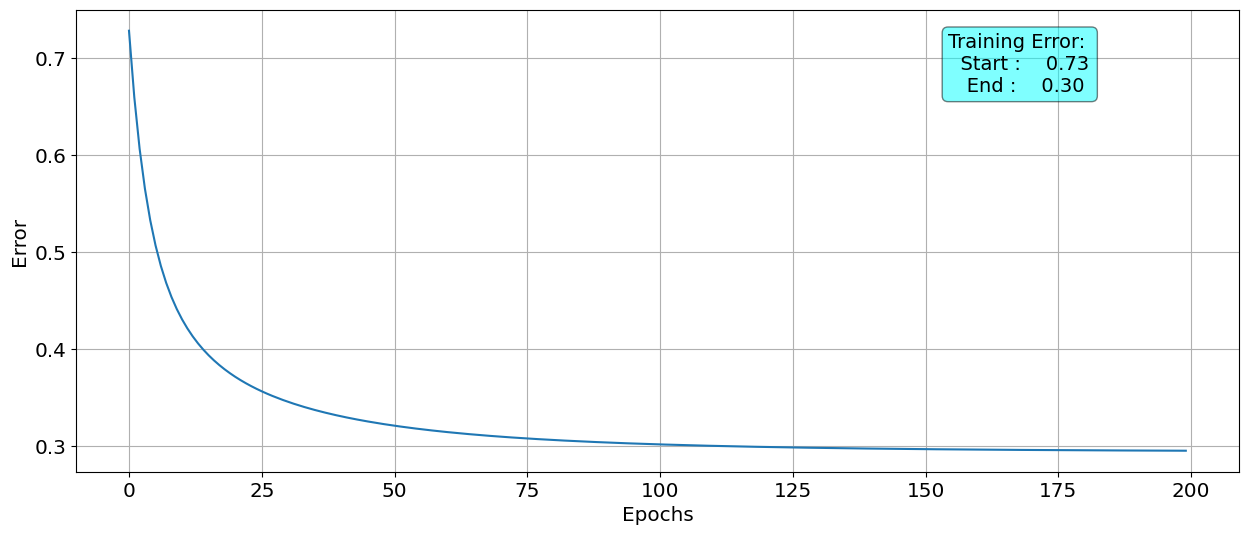

In [16]:
fig, ax = plt.subplots()
ax.plot(errors)

# little beautification
txtstr = "Training Error: \n  Start : {:7.2f}\n   End : {:7.2f}".format(errors[0],errors[-1]) #text to plot

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='cyan', alpha=0.5)

# place a text box in upper right in axes coords
ax.text(0.75, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")

ax.set_ylabel("Error")

ax.grid();

## 8. Predictions

In [17]:
predictions = []

for row in data_train:
    
    a = fn_predict(row, weights)
    
    prediction = 0
    
    if a >= 0.5: prediction = 1 # argmax

    predictions.append(prediction)

In [18]:
accuracy_score(data_train[:,-1], predictions)

0.8644444444444445

### Lets make some predictions on test data as well

In [19]:
predictions = []

for row in data_test:
    
    a = fn_predict(row, weights)
    
    prediction = 0
    
    if a >= 0.5: prediction = 1 # argmax

    predictions.append(prediction)

In [20]:
accuracy_score(data_test[:,-1], predictions)

0.9

In [21]:
cm = confusion_matrix(data_test[:,-1], predictions)
cm

array([[55,  3],
       [ 7, 35]])

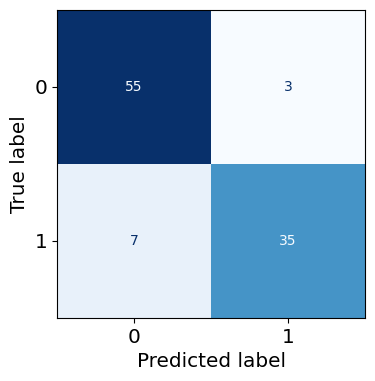

In [22]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False)

plt.show();

In [23]:
def fn_plot_decision_boundary(X_tr :  np.ndarray, 
                              X_ts:  np.ndarray, 
                              wts:  np.ndarray = weights):
    
    '''
    Args:
        X_tr :  Training dataset
        X_ts : Testing dataset
        wts : Weights
    '''
    
    fig, ax = plt.subplots();
    
    dm = 0.01
    margin = 10* dm
    x_min, x_max = X_tr[:, 0].min() - margin, X_tr[:, 0].max() + margin
    
    y_min, y_max = X_tr[:, 1].min() - margin, X_tr[:, 1].max() + margin
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    XX = np.c_[xx.ravel(), yy.ravel()]

    XX = np.hstack( ( XX, np.ones((XX.shape[0],1)) ) )
    
    
    y_pred = []
    
    for row in (XX):

        ###-----------------------
        ### Changes due to Sigmoid
        ###-----------------------
        a = fn_predict(row, wts)
        
        y_p = 0
        
        if a >= 0.5 : y_p = 1
            
        y_pred.append(y_p)
        
    Z = np.array(y_pred).reshape(xx.shape)

    # Plotting contours for data as per testing
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.Paired)
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=X_tr[:, 2],
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=X_ts[:, 2],
               s=150, marker = '*',edgecolor='k', cmap=plt.cm.inferno )
    
    ax.set_title('Decision Boundary')

    ax.set_xlabel('A')
    
    ax.set_ylabel('B')
    
    plt.show()

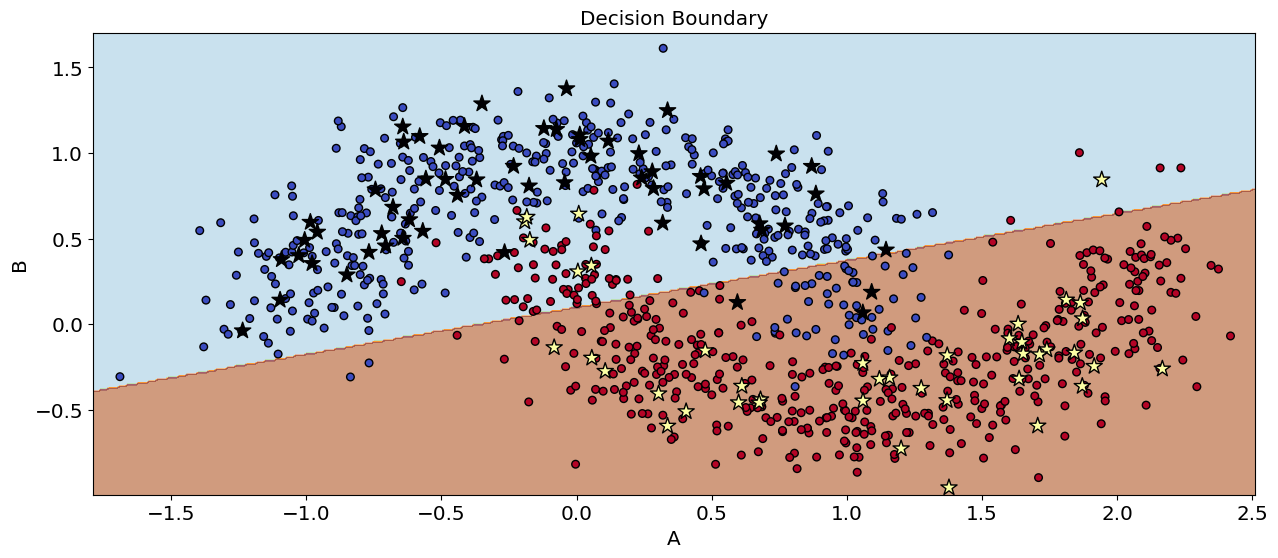

In [24]:
fn_plot_decision_boundary(data_train, data_test)